# PDF Power Hacks: What You Didn’t Know You Could Do with R and Your PDF Files  
### 🛡️ DIY in AI: Your data stays local. No uploads. No leaks.

# 📊 R | Batch Convert JPG, PNG, EPS to PDF 🖼️📄

## ❓Tired of sorting through folders full of images just to compile a report? 😩  
Online tools are clunky and pose privacy risks.  

## 👉 The Solution  
🧰 Use R with `{magick}` to batch convert image files to PDF.  
💡 Local, secure, and compatible with JPG, PNG, EPS formats.

## 🔧 How it Works  
📁 Point to an input folder  
📑 Filter by extension  
🌈 Convert to RGB for cross-platform compatibility  
📄 Save individual PDFs and a combined version  

## 🔎 Why it Matters  
🔐 Your visual data stays offline  
🚀 From hours of manual work to seconds  
📚 Consistent formatting across reports

## ✨ Real-world Case  
🧪 A clinical lab automates packaging 100+ microscopy images into PDFs for audits.  
📁 The result: reproducible and secure reporting — no cloud involved.

## ⚙️ Business Value  
💼 Standardized deliverables for regulators  
📉 Reduced manual errors  
⏱️ Faster compliance documentation

## 📊 Code Summary  
🔎 Scans folder for valid image types  
🎨 Converts images to RGB  
📄 Saves PDFs (individual + combined)  

🔗[GitHub](https://github.com/jcombari/RForAll/tree/main/PDF%20Power%20Hacks)

## 💡 Final Thought  
How much time do you spend tidying up files? Imagine automating just one of those tasks.

🔑 #Rstats #DataScience #Magick #Automation #PDFprocessing #DataPrivacy #DigitalWorkflows #AItools #DIYinAI

🔁 Found this helpful? Share it with someone who needs it.  
⚠️ Do not repost or copy without credit. Support original work.

---

# PDF Power Hacks: Todo lo que no sabías que podías hacer con R y tus archivos PDF  
### 🛡️ DIY en IA: Tus datos, solo en tu máquina. Nada se sube.

# 📊 R | Convierte JPG, PNG y EPS a PDF por lote 🖼️📄

## ❓¿Te ha tocado ordenar decenas de imágenes para un informe? 😩  
Los convertidores online son lentos y comprometen la privacidad.

## 👉 La Solución  
🧰 Usa R y `{magick}` para convertir imágenes a PDF por lote.  
💡 Funciona localmente, es seguro y compatible con JPG, PNG y EPS.

## 🔧 ¿Cómo funciona?  
📁 Seleccionas una carpeta de entrada  
📑 Filtras por extensión  
🌈 Conviertes a RGB para evitar errores  
📄 Guardas PDFs individuales y uno combinado  

## 🔎 ¿Por qué importa?  
🔐 Mantienes la información confidencial en tu máquina  
🚀 Reduces horas de trabajo a segundos  
📚 Logras formatos consistentes en todos tus informes

## ✨ Caso real  
🧪 Un laboratorio clínico genera más de 100 imágenes al día.  
📁 Automatizan su empaquetado en PDF para auditorías — sin subir nada a la nube.

## ⚙️ Valor para el negocio  
💼 Entregables estandarizados para reguladores  
📉 Menos errores manuales  
⏱️ Documentación de cumplimiento más rápida

## 📊 Resumen del código  
🔎 Recorre carpeta con imágenes válidas  
🎨 Convierte a RGB  
📄 Guarda PDFs (individual y combinado)

🔗[GitHub](https://github.com/jcombari/RForAll/tree/main/PDF%20Power%20Hacks)

## 💡 Reflexión  
¿Cuánto tiempo dedicas a ordenar archivos? ¿Qué podrías automatizar hoy para ganar tiempo mañana?

🔑 #Rstats #DataScience #Magick #Automatización #PDFprocessing #PrivacidadDeDatos #FlujosDigitales #HerramientasIA #DIYenIA

🔁 ¿Te resultó útil? Compártelo con quien lo necesite.  
⚠️ No lo copies ni publiques como propio. Respeta el trabajo original.

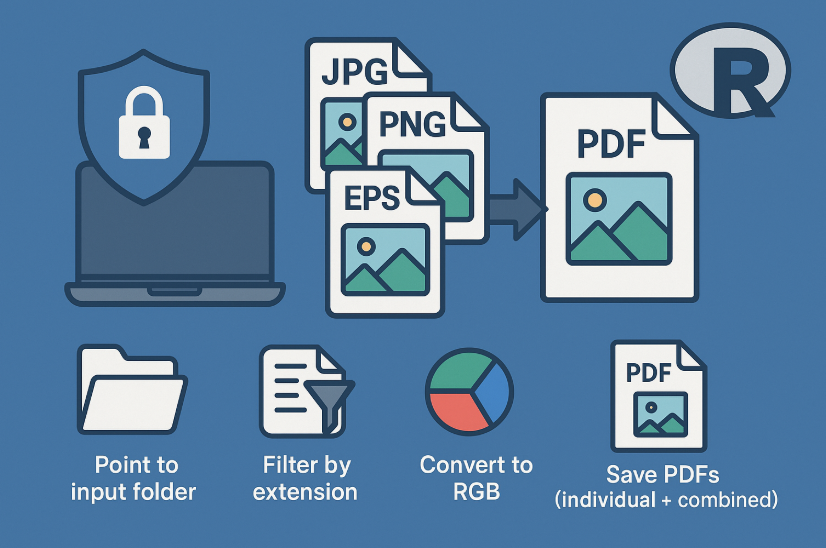



In [3]:
# Requiere: magick, fs
library(magick)
library(fs)

# Definir carpetas de entrada y salida
input_dir <- "202507220_input_images"
output_dir <- "202507220_output_pdfs"
dir_create(output_dir)

# Extensiones válidas
valid_exts <- c(".jpg", ".jpeg", ".png", ".eps")

# Obtener lista de archivos válidos
img_files <- dir_ls(input_dir, regexp = paste0("(", paste(valid_exts, collapse = "|"), ")$"), recurse = FALSE)

# Lista para almacenar imágenes para el PDF combinado
images_for_merge <- list()

# Procesar cada imagen individual
for (img_path in img_files) {
  img <- image_read(img_path)
  img_rgb <- image_convert(img, colorspace = "RGB")
  
  # Guardar PDF individual
  pdf_name <- file.path(output_dir, paste0("202507220_", path_ext_remove(path_file(img_path)), ".pdf"))
  image_write(img_rgb, path = pdf_name, format = "pdf")
  
  # Agregar a la lista para PDF combinado
  images_for_merge <- append(images_for_merge, list(img_rgb))
}

# Guardar PDF combinado si hay imágenes
if (length(images_for_merge) > 0) {
  merged_pdf_path <- file.path(output_dir, "202507220_combined_images.pdf")
  combined <- image_join(images_for_merge)
  image_write(combined, path = merged_pdf_path, format = "pdf")
}
